# FEATURE SELECTION AND ENGINEERING

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns

## Load dataset

In [2]:
train_df = pd.read_csv("Data/KDDTrain.csv")
test_df = pd.read_csv("Data/KDDTest.csv")

In [3]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,is_intrusion
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1


In [4]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,is_intrusion
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,0


## Numerical Correlations with target column

In [5]:
#Compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes
train_df.corr()['is_intrusion'].sort_values(ascending=False) 

is_intrusion                   1.000000
dst_host_srv_serror_rate       0.654984
dst_host_serror_rate           0.651840
serror_rate                    0.650651
srv_serror_rate                0.648287
count                          0.576442
dst_host_count                 0.375051
srv_rerror_rate                0.253502
dst_host_srv_rerror_rate       0.253428
rerror_rate                    0.253395
dst_host_rerror_rate           0.252562
dst_host_diff_srv_rate         0.242897
diff_srv_rate                  0.203658
wrong_fragment                 0.095905
dst_host_same_src_port_rate    0.092445
dst_host_srv_diff_host_rate    0.062330
duration                       0.048785
land                           0.007191
src_bytes                      0.005921
dst_bytes                      0.004118
srv_count                      0.000768
is_host_login                 -0.002629
urgent                        -0.002787
num_failed_logins             -0.003755
num_shells                    -0.009472


## Categorical Correlations using One-Hot Encoding

In [6]:
# Select only categorical variables
category_df = train_df.select_dtypes('object')

# One hot encode the variables
dummy_df = pd.get_dummies(category_df)

# Put the label column back in the dataframe
dummy_df['is_intrusion'] = train_df['is_intrusion']

dummy_df.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,is_intrusion
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
# Correlations in one-hot encoded dataframe
dummy_df.corr()['is_intrusion'].sort_values(ascending=False)

is_intrusion          1.000000
flag_S0               0.650205
service_private       0.449718
protocol_type_icmp    0.200453
flag_REJ              0.184947
                        ...   
service_smtp         -0.212312
protocol_type_udp    -0.217188
service_domain_u     -0.258930
service_http         -0.562320
flag_SF              -0.756285
Name: is_intrusion, Length: 85, dtype: float64

## Select Effective Feature Set

There are three steps:

a) Drop redundant & meaningless features

b) Select a set of features that are highly correlated with the target.

b) Combine some existing features (and see the correlation)

### Remove Redundant/Unnecessary Features

In [8]:
train_df = train_df.drop(columns=['num_outbound_cmds', 'srv_count', 'dst_bytes', 'src_bytes', 
                                  'land', 'is_host_login', 'urgent', 'num_failed_logins', 'num_shells'
                                 ])

test_df = test_df.drop(columns=['num_outbound_cmds', 'srv_count', 'dst_bytes', 'src_bytes', 
                                  'land', 'is_host_login', 'urgent', 'num_failed_logins', 'num_shells'
                                  ])

# Very low correlations: srv_count, dst_bytes , src_bytes, land, is_host_login, urgent, num_failed_logins, num_shells
# Very high correlations: --
# NaN: num_outbound_cmds, 

In [9]:
train_df.head()

,duration,protocol_type,service,flag,wrong_fragment,hot,logged_in,num_compromised,root_shell,su_attempted,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,is_intrusion
0,0,udp,other,SF,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1
2,0,tcp,http,SF,0,0,1,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0
3,0,tcp,http,SF,0,0,1,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1


### Select Highly Correlated Features

In [10]:
# Combine the one-hot coded categorical features with the numerical features
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

# Find correlations with the is_intrusion
# Note that we have considered the absolute values of the correlations
# This will help to identify the most correlated features 
most_correlated = train_df.corr().abs()['is_intrusion'].sort_values(ascending=False)

# Maintain the top 15 most correlation features with is_intrusion
most_correlated = most_correlated[:15]

print("Most Correlated Features:\n")
print(most_correlated)

# Select most highly correlated features without colinearity
train_df = train_df[['is_intrusion', 'flag_SF', 'same_srv_rate', 'dst_host_srv_count', 'logged_in', 'serror_rate', 'count', 'service_http', 'service_private', 'dst_host_count', 'service_domain_u', 'srv_rerror_rate']]
test_df = test_df[['is_intrusion', 'flag_SF', 'same_srv_rate', 'dst_host_srv_count', 'logged_in', 'serror_rate', 'count', 'service_http', 'service_private', 'dst_host_count', 'service_domain_u', 'srv_rerror_rate']]

Most Correlated Features:

is_intrusion                1.000000
flag_SF                     0.756285
same_srv_rate               0.751912
dst_host_srv_count          0.722546
dst_host_same_srv_rate      0.693813
logged_in                   0.690181
dst_host_srv_serror_rate    0.654984
dst_host_serror_rate        0.651840
serror_rate                 0.650651
flag_S0                     0.650205
srv_serror_rate             0.648287
count                       0.576442
service_http                0.562320
service_private             0.449718
dst_host_count              0.375051
Name: is_intrusion, dtype: float64


### Colinearity between Selected Features

In [11]:
'''Check for colinearity'''
train_df_cor = train_df.corr()
cor= train_df.corr().values
cor_cols = []
for ci in range(0, cor.shape[1]):
    for ri in range(0,cor.shape[0] ):
        if(cor[ri, ci]>0.9 and ri!=ci): #Threshold for colinearity = 0.9
            print("Colinear columns:", train_df_cor.columns[ci], train_df_cor.columns[ri])
            cor_cols.append(ci)
            cor_cols.append(ri)
        
cor_cols= list(set(cor_cols))

### Generate Heatmap to check correlation

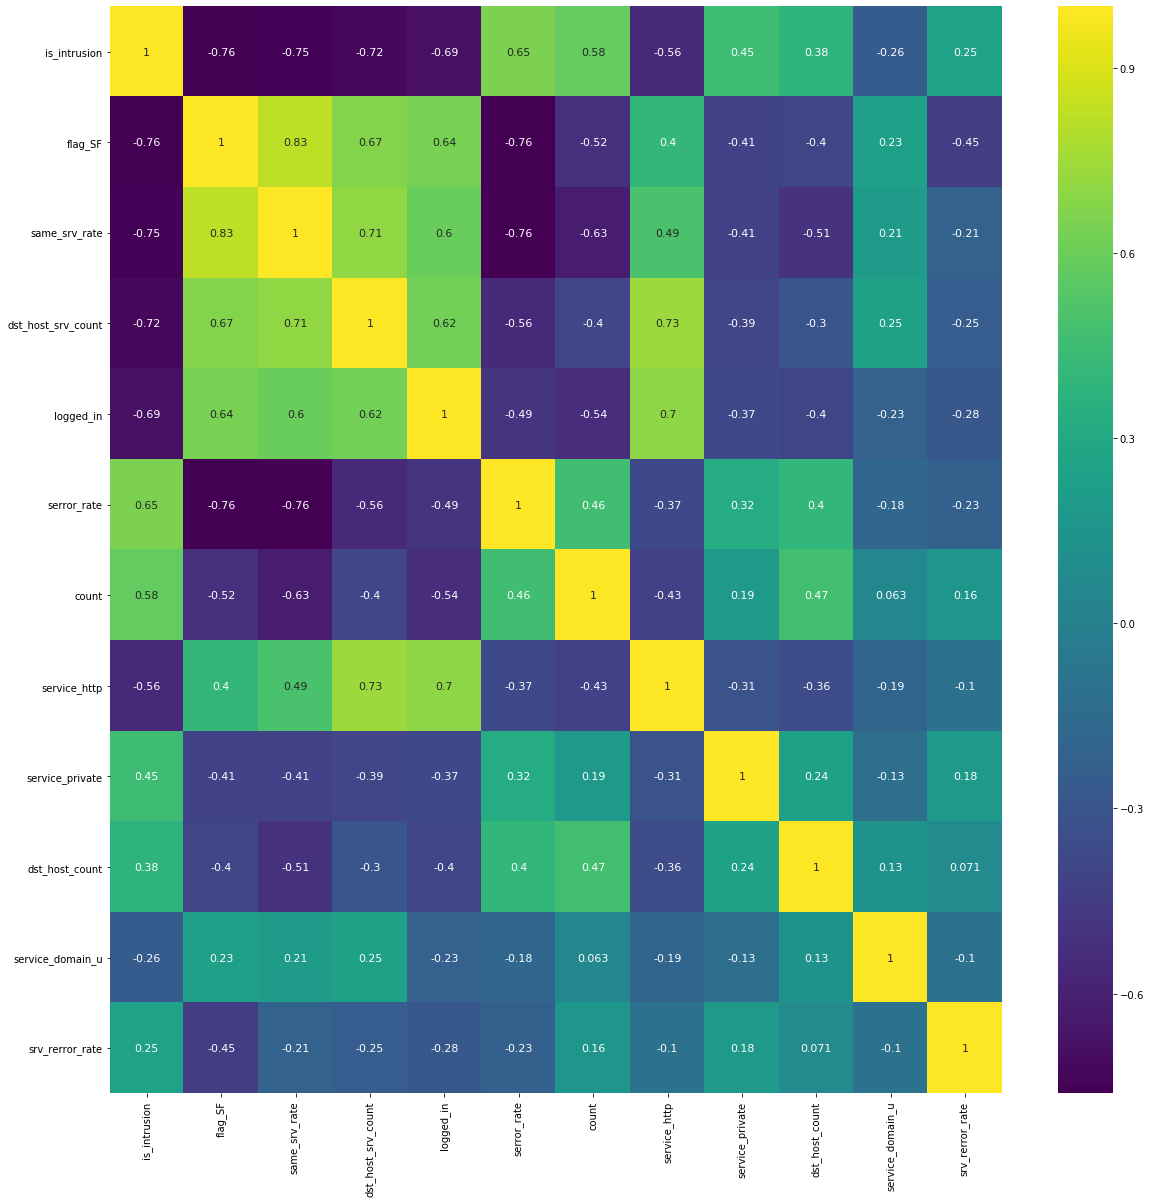

In [12]:
df_plt = train_df_cor[train_df_cor.index]
# Draw the heatmap with the mask and correct aspect ratio
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_plt, cmap='viridis', annot=True, annot_kws={"size": 11})
plt.show()

## Export Dataframes into CSV Files

In [13]:
train_df.to_csv("Data/KDDSelectedTrain.csv", index=False)
test_df.to_csv("Data/KDDSelectedTest.csv", index=False)